# **Amazon Metadata Dataset**


In [2]:
from collections import Counter
from pprint import pprint

import delta_sharing
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
from IPython.display import HTML, display
from wordcloud import WordCloud

In [3]:
# get data
profile_file = "config.share"
client = delta_sharing.SharingClient(profile_file)
print("Available tables:")
pprint(client.list_all_tables())

table_url = profile_file + "#share__products.bronze.sample_amazon_metadata"
df = delta_sharing.load_as_pandas(table_url, limit=50_000)

Available tables:
[Table(name='amazon_reviews', share='share__products', schema='silver'),
 Table(name='sample_amazon_metadata', share='share__products', schema='bronze')]


In [4]:
print("Dataset shape", df.shape)

df.head()

Dataset shape (50000, 17)


,also_buy,also_view,asin,brand,category,date,description,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
0,[],[],B0007KP9UO,Valley Forge,"[Patio, Lawn & Garden, Outdoor Dcor, Flags]",,"[Founded in 1882, Valley Forge Flag Company, I...",[US Navy residential flag symbolizes our count...,,[https://images-na.ssl-images-amazon.com/image...,Amazon Home,$14.47,"["">#61,007 in Patio, Lawn & Garden (See Top 10...","class=""a-bordered a-horizontal-stripes a-spa...",,,"Valley Forge, US Navy Flag, Nylon, 3' x 5', 10..."
1,[],[],B0007KP9T0,Valley Forge,"[Patio, Lawn & Garden, Gardening & Lawn Care, ...",,[5' Brushed Aluminum pole with plastic anti-wr...,"[Sold on Amazon, <span>\n <a href=https...",,[],Amazon Home,$17.29,"["">#97,482 in Patio, Lawn & Garden (See Top 10...","class=""a-bordered a-horizontal-stripes a-spa...",,,"Valley Forge, American Flag Pole, Brushed Alum..."
2,[],"[B0187YOEF2, B06XHXDLFR, B0013NTNCY, B074W2CWS4]",B0007KP9VS,Valley Forge,"[Patio, Lawn & Garden, Outdoor Dcor, Flags]",,"[Founded in 1882, Valley Forge Flag Company, I...",[P.O.W./M.I.A. double seal residential flag sy...,,[],Amazon Home,$29.96,"["">#57,978 in Patio, Lawn & Garden (See Top 10...","class=""a-bordered a-horizontal-stripes a-spa...",,,"Valley Forge, POW-MIA, Nylon, 3'x5', 100% Made..."
3,[],[],B0007KPA1C,Valley Forge,"[Patio, Lawn & Garden, Valley Forge Flag]",,[3'X5' State Flag manufactured by the leader i...,[Have pride in Indiana; hang your state flag f...,,[],Amazon Home,$22.08,"["">#248,656 in Patio, Lawn & Garden (See Top 1...",,,,"Valley Forge, Indiana State Flag, Nylon, 3' x ..."
4,[],[],B0007KP9Q8,Valley Forge,"[Patio, Lawn & Garden, Gardening & Lawn Care, ...",,"[30""x50"" Nylon flag with sewn stripes embroide...",[Valley Forge US Heritage residential flag sym...,,[],Amazon Home,,"["">#975,707 in Patio, Lawn & Garden (See Top 1...",,,,Valley Forge 30-Inch x 50-Inch Nylon Flag With...


**Insights**

- The columns that look like lists are actually numpy arrays. ¿Why they come in this format?

In [4]:
df.dtypes

also_buy        object
also_view       object
asin            object
brand           object
category        object
date            object
description     object
feature         object
fit             object
image           object
main_cat        object
price           object
rank            object
similar_item    object
tech1           object
tech2           object
title           object
dtype: object

---

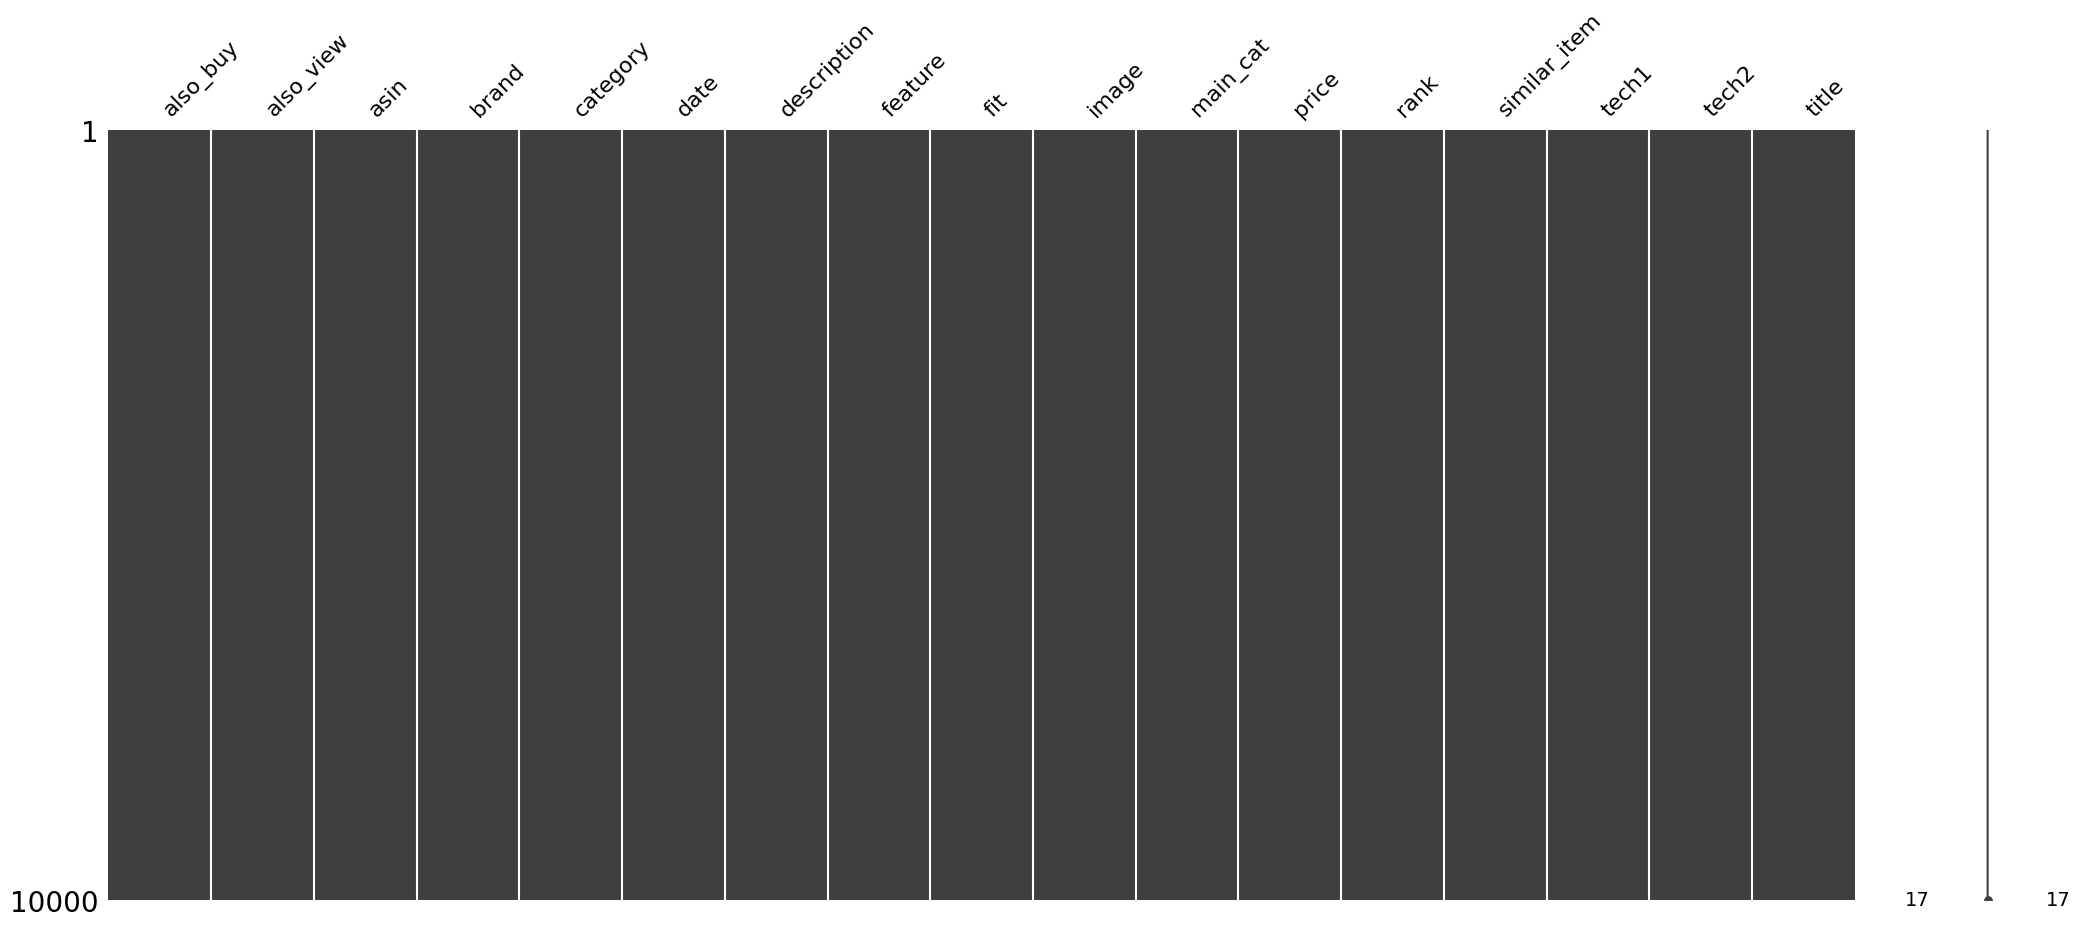

In [5]:
msno.matrix(df);

**Insights**
- There doesn't seem to be any missing values, but this might be due to the columns having the "wrong" datatype, like list or string.

---

In [5]:
df["asin"].value_counts()

asin
B0001Z5TJ6    2
B0001Z8KH4    2
B0001Z99TW    2
B0001ZDOH0    2
B0001ZIU8S    2
             ..
B000659JQA    1
B000659KEG    1
B00065AH4S    1
B000659KC8    1
B000659HRQ    1
Name: count, Length: 43172, dtype: int64

In [7]:
duplicated = df[df.duplicated(subset="asin", keep=False)].sort_values("asin")
duplicated

,also_buy,also_view,asin,brand,category,date,description,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
43884,"[B0045L3SNQ, B00001TZYD, B00004R9IN, B00002DHE...","[B00001TZYD, B00006DY18, B000K6TOK6, B00004R9I...",B00000INRB,Panasonic 3DO (Games),"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",,[The little plastic army men you played with a...,[1 or 2 Players Memory card 1 block],,[https://images-na.ssl-images-amazon.com/image...,Video Games,$75.99,"["">#18,319 in Video Games (See Top 100 in Vide...",,,,Army Men 3D
40180,"[B0045L3SNQ, B00001TZYD, B00004R9IN, B00002DHE...","[B00001TZYD, B00006DY18, B000K6TOK6, B00004R9I...",B00000INRB,Panasonic 3DO (Games),"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",,[The little plastic army men you played with a...,[1 or 2 Players Memory card 1 block],,[https://images-na.ssl-images-amazon.com/image...,Video Games,$75.99,"["">#18,319 in Video Games (See Top 100 in Vide...",,,,Army Men 3D
16342,[],[],B00000ISGY,Toysmith,"[Patio, Lawn & Garden, Outdoor Dcor, Garden Sc...",,"[Eat your heart out, Isaac Newton. Although it...",[],,[],Toys & Games,,"["">#2,825,834 in Toys & Games (See Top 100 in ...",,,,Rainbow Spectra-Arc
13218,[],[],B00000ISGY,Toysmith,"[Patio, Lawn & Garden, Outdoor Dcor, Garden Sc...",,"[Eat your heart out, Isaac Newton. Although it...",[],,[],Toys & Games,,"["">#2,825,834 in Toys & Games (See Top 100 in ...",,,,Rainbow Spectra-Arc
43885,"[B00004W5TY, B0787CML13, B07935XLNM, 630597272...",[],B00000JKVZ,Burger,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","<div class=""a-fixed-left-grid a-spacing-none"">...","[The comfortable, easy-to-wear, soft cotton ma...","[100% Cotton, Imported, Excellent quality, Com...",,[],Movies & TV,,[],,,,Naruto Shippuden Anime Funny Art Design Men's ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47584,[],[],B0005IB51U,Pitbull Gym,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","<div class=""a-fixed-left-grid a-spacing-none"">...",[100% cotton t-shirt with the world famous ori...,"[Made in USA, MADE IN THE USA, MADE IN THE USA...",,[https://images-na.ssl-images-amazon.com/image...,"<img src=""https://images-na.ssl-images-amazon....",$23.95,"21,387,280 in Clothing, Shoes & Jewelry (",,,,Pitbull Gym &quot;Barbells&quot; T-Shirt
47587,[],[],B0005IB5OM,Pitbull Gym,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","<div class=""a-fixed-left-grid a-spacing-none"">...",[100% cotton t-shirt with the world famous ori...,"[Made in USA, MADE IN THE USA, MADE IN THE USA...",,[],"<img src=""https://images-na.ssl-images-amazon....",,"18,352,493 in Clothing, Shoes & Jewelry (",,,,Pitbull Gym &quot;Barbells&quot; T-Shirt
43883,[],[],B0005IB5OM,Pitbull Gym,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","<div class=""a-fixed-left-grid a-spacing-none"">...",[100% cotton t-shirt with the world famous ori...,"[Made in USA, MADE IN THE USA, MADE IN THE USA...",,[],"<img src=""https://images-na.ssl-images-amazon....",,"18,352,493 in Clothing, Shoes & Jewelry (",,,,Pitbull Gym &quot;Barbells&quot; T-Shirt
47586,[],[],B0005IB5QA,Pitbull Gym,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","<div class=""a-fixed-left-grid a-spacing-none"">...",[100% cotton t-shirt with the world famous ori...,"[Made in USA, MADE IN THE USA, MADE IN THE USA...",,[],"<img src=""https://images-na.ssl-images-amazon....",,"10,838,748 in Clothing, Shoes & Jewelry (",,,,Pitbull Gym &quot;Barbells&quot; T-Shirt


In [13]:
num_dup = df.duplicated("asin", keep="first").sum()
print(f"Percentaje of duplicated reviews {num_dup / len(df) * 100:.2f}%")

Percentaje of duplicated reviews 13.66%


**Insights**
- 13% of products are duplicates.

---

In [6]:
# shapes of the arrays in the also_buy column
df["also_buy"].map(lambda x: x.shape).unique()

array([(0,), (14,), (1,), (4,), (24,), (97,), (8,), (59,), (83,), (100,),
       (79,), (17,), (2,), (19,), (5,), (3,), (31,), (45,), (44,), (26,),
       (99,), (16,), (89,), (30,), (23,), (81,), (6,), (92,), (12,),
       (27,), (15,), (98,), (10,), (52,), (9,), (85,), (93,), (13,), (7,),
       (61,), (88,), (90,), (21,), (18,), (53,), (11,), (95,), (72,),
       (37,), (49,), (39,), (55,), (40,), (70,), (25,), (66,), (60,),
       (96,), (48,), (91,), (94,), (35,), (58,), (28,), (63,), (47,),
       (34,), (38,), (20,), (32,), (22,), (65,), (82,), (73,), (50,),
       (84,), (87,), (56,), (54,), (29,), (51,), (33,), (36,), (71,),
       (68,), (80,), (77,), (41,), (64,), (86,), (75,), (74,), (62,),
       (46,), (67,), (57,), (42,), (78,), (76,)], dtype=object)

**Insights**
- `also_buy` columns are 1-dimensional numpy arrays, so they might be better represented as python lists.

In [145]:
print("'also buy' len greater than 0:")
(df["also_buy"].map(lambda x: len(x) > 0).value_counts() / len(df) * 100).reset_index()

'also buy' len greater than 0:


,also_buy,count
0,False,83.242
1,True,16.758


**Insight**
- More than 85% of the products don't have `also_buy` items.

In [8]:
also_buy_no_null = df["also_buy"].map(lambda x: x.tolist() if x.size > 0 else None).dropna()
also_buy_no_null

13      [B0034YXZ1A, B01HMWWLCI, B01N5KNK8I, B000BQWWU...
23                                           [B001900XQ6]
25       [B00T1QC5GQ, B001PL7XJE, B00GT0NSBS, B0007KP9S6]
26      [B00171EDR2, B01M0S998Z, B0007KP9VS, B005CKPPU...
56                                           [B008JSOR8Q]
                              ...                        
9939    [B00IT2SGOI, 0789496879, B002BFS9E6, B001CZ9R1...
9940                                         [0789496879]
9944    [B00FL1B4IU, B00ECEFR6M, B009JCWKBC, B0721N49Y...
9954    [B01NCMH2B5, B000NMQHVQ, B00GQTYU0U, B00GQTYSK...
9957    [B004AHLNIM, B00B2J9QWQ, B0013MTIHA, B00DEE7F1...
Name: also_buy, Length: 1331, dtype: object

---

In [136]:
# shapes of the arrays in the also_buy column
df["also_buy"].map(lambda x: x.shape).unique()

array([(0,), (14,), (1,), (4,), (24,), (97,), (8,), (59,), (83,), (100,),
       (79,), (17,), (2,), (19,), (5,), (3,), (31,), (45,), (44,), (26,),
       (99,), (16,), (89,), (30,), (23,), (81,), (6,), (92,), (12,),
       (27,), (15,), (98,), (10,), (52,), (9,), (85,), (93,), (13,), (7,),
       (61,), (88,), (90,), (21,), (18,), (53,), (11,), (95,), (72,),
       (37,), (49,), (39,), (55,), (40,), (70,), (25,), (66,), (60,),
       (96,), (48,), (91,), (94,), (35,), (58,), (28,), (63,), (47,),
       (34,), (38,), (20,), (32,), (22,), (65,), (82,), (73,), (50,),
       (84,), (87,), (56,), (54,), (29,), (51,), (33,), (36,), (71,),
       (68,), (80,), (77,), (41,), (64,), (86,), (75,), (74,), (62,),
       (46,), (67,), (57,), (42,), (78,), (76,), (69,), (43,)],
      dtype=object)

**Insights**
- `also_buy` columns are 1-dimensional numpy arrays, so they might be better represented as python lists.

---

In [9]:
df["brand"].value_counts().reset_index()

,brand,count
0,Flagline,227
1,Music City Metals,192
2,Craftsman,184
3,,177
4,Oregon,144
...,...,...
2289,Bradfield,1
2290,P & I Gordon,1
2291,Iwan,1
2292,Korea,1


**Insights**
- This counts might not be relevant as this is only a small subset of the whole dataset.

In [146]:
print("'also_view' len greater than 0:")
(df["also_view"].map(lambda x: len(x) > 0).value_counts() / len(df) * 100).reset_index()

'also_view' len greater than 0:


,also_view,count
0,False,72.808
1,True,27.192


---

In [16]:
print("Length of product categories:", df["category"].map(lambda x: x.shape).unique())

Length of product categories: [(3,) (4,) (2,) (5,) (6,) (8,) (11,) (10,) (9,) (0,) (12,) (7,) (13,)
 (14,) (15,)]


In [170]:
categories = Counter()

df["category"].map(lambda x: categories.update(x.tolist()))

print("Number of categories:", len(categories))

Number of categories: 30665


In [172]:
print("Most common categories:")

categories.most_common(10)

Most common categories:


[('Clothing, Shoes & Jewelry', 30000),
 ('Patio, Lawn & Garden', 16836),
 ('Women', 15267),
 ('Men', 9611),
 ('Clothing', 8203),
 ('Shoes', 7237),
 ('Gardening & Lawn Care', 5512),
 ('Jewelry', 5257),
 ('Outdoor Dcor', 3864),
 ('Imported', 3559)]

---

In [21]:
print("date column dtype:", type(df["date"][0]))
df["date"].head()

date column dtype: <class 'str'>


0    
1    
2    
3    
4    
Name: date, dtype: object

**Insights**
- Date column is completely empty

In [22]:
print("Number of descriptions:", df["description"].map(lambda x: x.shape).unique())

df["description"].map(lambda x: x if len(x) > 0 else None).dropna()

Number of descriptions: [(1,) (2,) (3,) (8,) (7,) (0,) (11,) (5,) (4,) (9,) (10,) (12,) (6,) (13,)
 (27,) (17,) (20,) (18,) (21,) (22,) (25,) (23,) (15,) (14,) (26,) (16,)
 (19,) (29,) (24,) (28,) (32,) (30,) (35,) (33,)]


0        [Founded in 1882, Valley Forge Flag Company, I...
1        [5' Brushed Aluminum pole with plastic anti-wr...
2        [Founded in 1882, Valley Forge Flag Company, I...
3        [3'X5' State Flag manufactured by the leader i...
4        [30"x50" Nylon flag with sewn stripes embroide...
                               ...                        
49994    [These basic solid color suspenders are a grea...
49995    [From its humble beginnings in 1825 in the tin...
49996    [These basic solid color suspenders are a grea...
49998    [.925 sterling silver Moon &amp; Star. Purple ...
49999    [Go back to the classics with this triple-buck...
Name: description, Length: 43098, dtype: object

In [14]:
print("Number of descriptions:")

df["description"].dropna().map(len).value_counts()

Number of descriptions:


description
1     8012
2     1242
0      431
3       92
5       55
4       51
6       23
7       23
8       19
9       14
13       9
10       5
11       4
12       3
17       3
20       3
27       2
18       2
25       2
21       1
22       1
23       1
15       1
14       1
Name: count, dtype: int64

In [31]:
for _, row in df.dropna(subset=["description"]).sample(1).iterrows():
    description = row["description"]
    print("Number of descriptions:", len(description))
    print(description)

Number of descriptions: 1
['Tech Swiss offers a full line of premium quality replacement watch bands. The strap featured is genuine Italian Calfskin leather with Crocodile grain, lightly padded, silver-tone polish finish Stainless Steel buckle, soft Nubuck leather lining and slightly tapered cut and matching stitching for durability. Watchband is available in many sizes. Tech Swiss offers a full line of watch bands in calfskin leather, crocodile, alligator, lizard, ostrich, shark and sting-ray. We carry a wide range of straps lengths in including Ladies-standard, Mens-standard, Long, Extra-Long and XX-Long. Tech Swiss only uses the highest quality of materials including superior soft Nubuck and genuine leather linings. Our construction of the bands feature reinforced stitching around the band. We offer many combinations of styles, designs and finishes in buckles that are all Nickel Free. All of our straps include stainless steel spring bars. We are confident you will not find a larger 

**Insights**
- Some products don't have description.
- Most products have one or two descriptions. But there are a few with more than 10 or 20.
- Some are in html format and contain images

In [16]:
print("Number of features:", df["feature"].map(lambda x: x.shape).unique())

df["feature"].map(lambda x: x if len(x) > 0 else None).dropna()

Number of features: [(5,) (2,) (10,) (0,) (1,) (3,) (6,) (4,) (12,) (8,) (7,) (9,) (37,) (22,)
 (14,) (20,) (11,) (16,) (21,) (17,) (13,) (15,) (19,) (25,) (31,) (30,)
 (32,) (18,) (39,)]


0       [US Navy residential flag symbolizes our count...
1       [Sold on Amazon, <span>\n        <a href=https...
2       [P.O.W./M.I.A. double seal residential flag sy...
3       [Have pride in Indiana; hang your state flag f...
4       [Valley Forge US Heritage residential flag sym...
                              ...                        
9995    ["AA" powered Electronic swatter. Our Electron...
9996    [Extra large fill opening prevents spills when...
9997    [Coverage Area: 3,000 sq. ft., Sprinkler Mater...
9998    [For use with Wood Stains, Sealers and Waterpr...
9999    [Sprays for 10 hours (600 Minutes) on a single...
Name: feature, Length: 8817, dtype: object

In [17]:
print("Number of features")

df["feature"].dropna().map(len).value_counts()

Number of features


feature
5     4190
0     1183
3     1136
4     1012
1      994
2      596
8      193
6      169
10     158
7      101
9       99
11      48
12      31
13      24
16      14
15      13
14      10
18       6
20       4
19       4
22       3
21       3
39       2
25       2
37       1
17       1
31       1
32       1
30       1
Name: count, dtype: int64

In [38]:
for _, row in df.sample(1).iterrows():
    features = row["feature"]
    print("Number of features:", len(features))
    print(features)

Number of features: 3
['Heavy bright nickel plated grates'
 '22-1/2" for One Touch, Master-Touch & Bar-B-Kettle grills'
 'Curved handgrips that can hang from kettle handles']


---

In [44]:
print("'fit' column dtype:", type(df["fit"][0]))
print()
df["fit"].isnull().value_counts()

'fit' column dtype: <class 'str'>



fit
False    50000
Name: count, dtype: int64

**Insights**
- All values from the `fit` column are missing

---

In [45]:
df["main_cat"].value_counts().reset_index()

,main_cat,count
0,"<img src=""https://images-na.ssl-images-amazon....",26365
1,Amazon Home,15332
2,Office Products,2588
3,Sports & Outdoors,2175
4,Tools & Home Improvement,722
5,Toys & Games,603
6,Pet Supplies,328
7,Automotive,295
8,"<img src=""https://m.media-amazon.com/images/G/...",254
9,Health & Personal Care,203


---

In [21]:
print(df["tech1"].isnull().value_counts())

print(df["tech2"].isnull().value_counts())

tech1
False    10000
Name: count, dtype: int64
tech2
False    10000
Name: count, dtype: int64


**Insights**
- `tech1` and `tech2` are completely empty.

In [46]:
df["title"]

0        Valley Forge, US Navy Flag, Nylon, 3' x 5', 10...
1        Valley Forge, American Flag Pole, Brushed Alum...
2        Valley Forge, POW-MIA, Nylon, 3'x5', 100% Made...
3        Valley Forge, Indiana State Flag, Nylon, 3' x ...
4        Valley Forge 30-Inch x 50-Inch Nylon Flag With...
                               ...                        
49995                  CLARKS Women's Amelia Open-Toe Mule
49996    CTM Men's Elastic X-Back Suspenders with Brass...
49997    White Basic Elastic Suspender with Silver Fini...
49998            Nipple Ring with sterling moon &amp; star
49999             CLARKS Women's Sunbeat Adjustable Sandal
Name: title, Length: 50000, dtype: object

---

In [54]:
df["rank"].sort_values()

21043    1,000,285 in Clothing, Shoes & Jewelry (
8607                  1,000,427 in Pet Supplies (
26327    1,001,340 in Clothing, Shoes & Jewelry (
47742    1,001,438 in Clothing, Shoes & Jewelry (
28948            1,001,465 in Sports & Outdoors (
                           ...                   
32277                                          []
11231                                          []
32241                                          []
47444                                          []
47325                                          []
Name: rank, Length: 50000, dtype: object

In [197]:
for _, row in df.sample(3).iterrows():
    rank = row["rank"]
    main_cat = row["main_cat"]
    if (
        main_cat
        == '<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>'
    ):
        main_cat = "Clothing, Shoes & Jewelry"
    categories = row["category"]
    print("RANK         :", rank)
    print("MAIN CATEGORY:", main_cat)
    print("CATEGORIES   :", categories.tolist()[:4])
    print("\n\n")

RANK         : 3,562,841 in Sports & Outdoors (
MAIN CATEGORY: Sports & Outdoors
CATEGORIES   : ['Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Boots']



RANK         : [">#70,431 in Patio, Lawn & Garden (See Top 100 in Patio, Lawn & Garden)",">#134 in Patio, Lawn & Garden > Pools, Hot Tubs & Supplies > Heaters & Accessories"]
MAIN CATEGORY: Amazon Home
CATEGORIES   : ['Patio, Lawn & Garden', 'Pools, Hot Tubs & Supplies', 'Heaters & Accessories']



RANK         : 406,429 in Clothing, Shoes & Jewelry (
MAIN CATEGORY: Clothing, Shoes & Jewelry
CATEGORIES   : ['Clothing, Shoes & Jewelry', 'Women', 'Accessories', 'Wallets, Card Cases & Money Organizers']





**Insights**
- Rank column contains selling ranking of the product inside different categories.
- Rank column comes in string format so there needs to be some preprocessing.
- The mentioned categories in the rankings seem to match with the 'main_cat'(Main Category) and 'category'(Secondary Categories) of the products.

---

In [135]:
print("'similar_item' column dtype:", type(df["similar_item"][0]))

df["similar_item"].map(len).value_counts()

'similar_item' column dtype: <class 'str'>


similar_item
0        41080
32566        9
32810        8
22843        8
22246        7
         ...  
31526        1
31628        1
33477        1
31570        1
33304        1
Name: count, Length: 5773, dtype: int64

In [77]:
for _, row in df[df["similar_item"].map(len) > 0].sample(1).iterrows():
    similar_item = row["similar_item"]
    display(HTML(similar_item))

,This item Medina Growin Green Granular Organic Fertilizer 4-2-3 3000 Sq. Ft. Granules 40 Lb.,"Espoma GM25 Organic 3-2-3 Chicken Manure, 25 lb","SUPERthrive VI30148 Plant Vitamin Solution, 4 Ounce - 00014","Unco Industries WWSB30LB Builder Worm Castings, 30 lb. Compost, Soil, 30-Pound","Safer Brand Ringer Lawn Restore, Lawn Fertilizer - 25 Pounds","Dr. Earth Super Natural Lawn 9-0-5 Fertilizer, 18 lb"
,Add to Cart,Add to Cart,Add to Cart,Add to Cart,Add to Cart,Add to Cart
Customer Rating,5 out of 5 stars (2),4 out of 5 stars (29),4 out of 5 stars (877),4 out of 5 stars (1227),4 out of 5 stars (443),4 out of 5 stars (26)
Price,$38.06$38 06,$29.96$29 96,$6.65$6 65,$30.58$30 58,$36.81$36 81,$37.00$37 00
Shipping,Eligible for FREE Shipping,Eligible for FREE Shipping,Eligible for FREE Shipping,Eligible for FREE Shipping,Eligible for FREE Shipping,Eligible for FREE Shipping
Sold By,Champion Values,VirVentures,Amazon.com,Amazon.com,Amazon.com,Amazon.com
Item Dimensions,5.3 x 15 x 23 in,13.5 x 3.75 x 20.25 in,13.78 x 7.87 x 4.72 in,24.1 x 15.4 x 4 in,3.23 x 14.11 x 24.01 in,24 x 15 x 4 in


**Insights**
- 'similar_item' comes in string format but is really html code.
- It consists of similar products, they come with an image and a title.